In [12]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [13]:
df = pd.read_csv('framingham.csv')

In [14]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


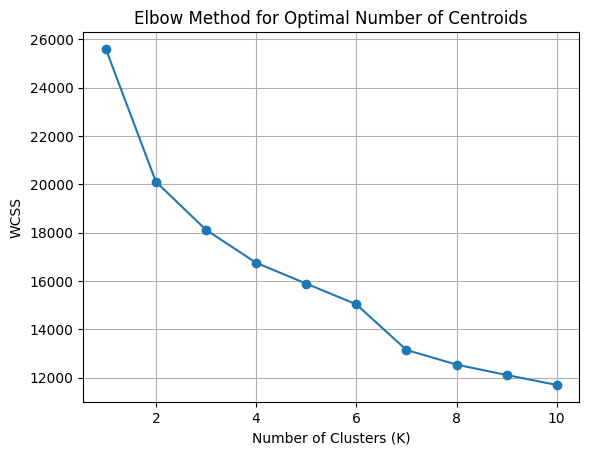

In [15]:
# Step 2: Drop rows with missing values
df = df.dropna()

# Step 3: Select relevant numerical features for clustering
features = df[['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]

# Step 4: Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 5: Use Elbow Method to find optimal number of centroids (clusters)
wcss = []  # Within-cluster sum of squares
K_range = range(1, 11)  # Test from 1 to 10 centroids

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

# Step 6: Plot the Elbow curve
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Centroids')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [16]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [17]:
# Step 2: Load Framingham Dataset
df = pd.read_csv("framingham.csv")

In [18]:

# Step 3: Handle Missing Values with Median Imputation
df_numeric = df.select_dtypes(include='number')
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

In [19]:
# Step 4: Scale Features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_numeric.columns)

In [20]:
# Step 5: Compute WCSS for k = 1 to 10
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

In [21]:
# Step 6: Find Optimal k using KneeLocator
knee = KneeLocator(k_values, wcss, curve='convex', direction='decreasing')
optimal_k = knee.elbow
print(f"\nOptimal number of clusters (k) using Elbow Method: {optimal_k}")


Optimal number of clusters (k) using Elbow Method: 5


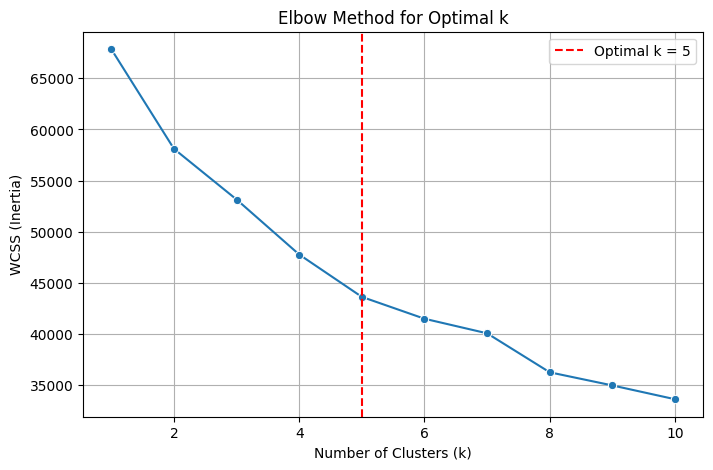

In [22]:
# Step 7: Plot Elbow Curve
plt.figure(figsize=(8, 5))
sns.lineplot(x=k_values, y=wcss, marker='o')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
# Step 8: Fit final KMeans with optimal_k and assign cluster labels
final_kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
cluster_labels = final_kmeans.fit_predict(df_scaled)

In [24]:
# Step 9: Add cluster labels to the original imputed DataFrame
df_imputed['Cluster'] = cluster_labels

In [25]:
# Optional: View a few rows
print(df_imputed.head())

   male   age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0   1.0  39.0        4.0            0.0         0.0     0.0              0.0   
1   0.0  46.0        2.0            0.0         0.0     0.0              0.0   
2   1.0  48.0        1.0            1.0        20.0     0.0              0.0   
3   0.0  61.0        3.0            1.0        30.0     0.0              0.0   
4   0.0  46.0        3.0            1.0        23.0     0.0              0.0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0           0.0       0.0    195.0  106.0   70.0  26.97       80.0     77.0   
1           0.0       0.0    250.0  121.0   81.0  28.73       95.0     76.0   
2           0.0       0.0    245.0  127.5   80.0  25.34       75.0     70.0   
3           1.0       0.0    225.0  150.0   95.0  28.58       65.0    103.0   
4           0.0       0.0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  Cluster  
0         0.0      

In [26]:
df_imputed['Cluster'].value_counts()


Cluster
1    1591
2    1369
0    1147
3     108
4      25
Name: count, dtype: int64

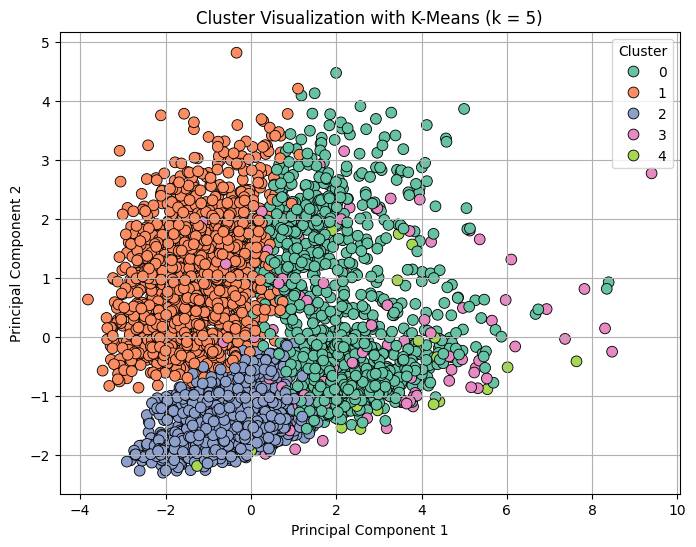

In [27]:
from sklearn.decomposition import PCA

# Step 13: Reduce to 2 principal components for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

# Step 14: Create a DataFrame for plotting
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = cluster_labels

# Step 15: Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='Set2', s=60, edgecolor='k')
plt.title(f'Cluster Visualization with K-Means (k = {optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
